# Text Classification Project

In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from tabulate import tabulate
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,  BaggingClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from services.text_tokenizer import  *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from services.prepare_data2 import prepare_data2
import xlrd

In [2]:
#alexa = pd.read_csv('./data/alexa_reviews.csv', usecols=['rating', 'verified_reviews'], encoding = 'cp1252')
#data = pd.read_csv('./data/ChelseaFC.csv', usecols=['full_tweet'], encoding='UTF-8')
alexa = pd.read_excel('./data/alexa_reviews_exc.xls', usecols=['rating', 'verified_reviews'])


# Data cleansing

* `prepare data` - function to prepare data to further analysis, contains functions like:
* `clean_text` - function to clean text and delete emoticons, https adresses, punctuation marks and others
* `delete_stopwords` - function to delete english stopwords for tweet text
* `stem_text` - function to stemming text

The above helper functions available in the services directory.

In [3]:
alexa_cl = prepare_data2(alexa)


## Wordcloud

* `wordcloud` - function to create wordcloud based on frequencies of words from tweets about clubs

#### Parameters:
* **df** - dataframe to generate a word cloud
* **color** - matplotlib colormap parameter for plot
* **club** - full name of club to display on plot's title

In [4]:
def wordcloud(df, color: str, club: str):
    uniques = list(set(df))
    bow = {unique: df.count(unique) for unique in uniques}
    wc = WordCloud(width=1000, height=1000, background_color='white',
                   colormap=color)
    wc_freq = wc.generate_from_frequencies(bow)
    plt.axis("off")
    plt.imshow(wc_freq, interpolation='bilinear')
    plt.title(f"Most frequent words in tweets about {club}")
    plt.show()

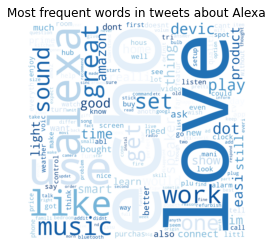

In [5]:
wordcloud(alexa_cl, 'Blues', 'Alexa')

In [6]:
def analyze_tokens_and_doc(dataset, color: str, club: str):
    dataset = dataset['verified_reviews']

    vectorizer = CountVectorizer(tokenizer=text_tokenizer)
    vectorizer_tf = TfidfVectorizer(tokenizer=text_tokenizer)

    X_transform_sample = vectorizer.fit_transform(dataset)
    X_transform_sample_tf = vectorizer_tf.fit_transform(dataset)
    titles = (vectorizer.get_feature_names_out())
    array = X_transform_sample.toarray()
    array_tf = X_transform_sample_tf.toarray()


    ''' Display top 15 tokens  '''

    column_sum = np.sum(array, axis=0)
    max_val_col = np.argpartition(column_sum, -15)[-15:]
    top_15 = column_sum[max_val_col]

    ''' Display top 15 documents  '''

    row_sum = np.sum(array, axis=1)
    max_val_row = np.argpartition(row_sum, -15)[-15:]
    top_15_docs = row_sum[max_val_row]


    ''' Display top 15 most important tokens  '''

    tf_col_sum = np.sum(array_tf, axis=0)
    max_tf_val_col = np.argpartition(tf_col_sum, -15)[-15:]
    top_15_tf = tf_col_sum[max_tf_val_col]

    ''' Bar plot of quantity top 15 tokens'''

    top_15_tokens = titles[np.argpartition(column_sum, -15)[-15:]]
    top_15_quantity = column_sum[max_val_col]

    plt.barh(top_15_tokens, top_15_quantity, color= color)
    plt.title('Quantity of top 15 tokens in tweets about ' + club)
    plt.xlabel('Quantity')
    plt.ylabel('Tokens')
    plt.show()

    ''' Pretty table '''

    df_1 = pd.DataFrame({'titles': top_15_tokens, 'quantity': top_15_quantity})

    top_15_tf_tokens = titles[np.argpartition(tf_col_sum, -15)[-15:]]
    top_15_tf_quantity = tf_col_sum[max_tf_val_col]
    print(tabulate(df_1, headers='keys', tablefmt='psql'))

    ''' Bar plot of TF-IDF indexes top 15 most important tokens'''

    plt.barh(top_15_tf_tokens, top_15_tf_quantity, color= color)
    plt.title('TFIDF of top 15 most important tokens in tweets about ' + club)
    plt.xlabel('TFIDF')
    plt.ylabel('Tokens')
    plt.show()

    ''' Pretty table '''

    df_2 = pd.DataFrame({'titles': top_15_tf_tokens, 'TFIDF': top_15_tf_quantity})
    print(tabulate(df_2, headers='keys', tablefmt='psql'))

    ''' Binary weight '''

    vectorizer_bw = CountVectorizer(tokenizer=text_tokenizer, binary=True)
    X_transform_bw_sample = vectorizer_bw.fit_transform(dataset)
    titles_bw = (vectorizer_bw.get_feature_names_out())
    array_bw = X_transform_bw_sample.toarray()

    column_sum_bw = np.sum(array_bw, axis=0)
    max_val_col_bw = np.argpartition(column_sum_bw, -15)[-15:]
    top_15_bw = column_sum_bw[max_val_col_bw]

    top_15_bw_terms = titles_bw[np.argpartition(column_sum_bw, -15)[-15:]]

    plt.barh(top_15_bw_terms, top_15_bw, color= color)
    plt.title('Top 15 Crucial Tokens based on binary weight in tweets about ' + club)
    plt.xlabel('Weight')
    plt.ylabel('Term')
    plt.show()

    ''' Pretty table '''

    df_3 = pd.DataFrame({'term': top_15_bw_terms, 'weight': top_15_bw})
    print(tabulate(df_3, headers='keys', tablefmt='psql'))

## Tokens and documents

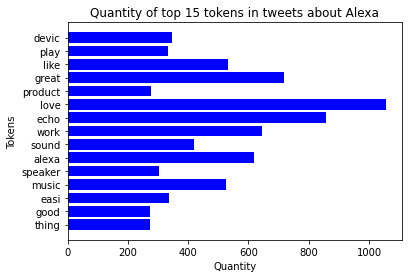

+----+----------+------------+
|    | titles   |   quantity |
|----+----------+------------|
|  0 | thing    |        272 |
|  1 | good     |        274 |
|  2 | easi     |        337 |
|  3 | music    |        526 |
|  4 | speaker  |        303 |
|  5 | alexa    |        619 |
|  6 | sound    |        421 |
|  7 | work     |        644 |
|  8 | echo     |        856 |
|  9 | love     |       1058 |
| 10 | product  |        276 |
| 11 | great    |        717 |
| 12 | like     |        532 |
| 13 | play     |        332 |
| 14 | devic    |        345 |
+----+----------+------------+


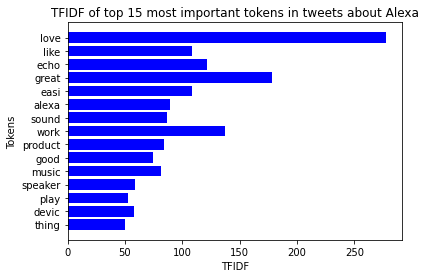

+----+----------+----------+
|    | titles   |    TFIDF |
|----+----------+----------|
|  0 | thing    |  50.3859 |
|  1 | devic    |  57.9812 |
|  2 | play     |  53.0535 |
|  3 | speaker  |  58.647  |
|  4 | music    |  81.0136 |
|  5 | good     |  74.1454 |
|  6 | product  |  84.4268 |
|  7 | work     | 137.584  |
|  8 | sound    |  86.3938 |
|  9 | alexa    |  89.2165 |
| 10 | easi     | 108.365  |
| 11 | great    | 177.969  |
| 12 | echo     | 121.675  |
| 13 | like     | 108.826  |
| 14 | love     | 277.855  |
+----+----------+----------+


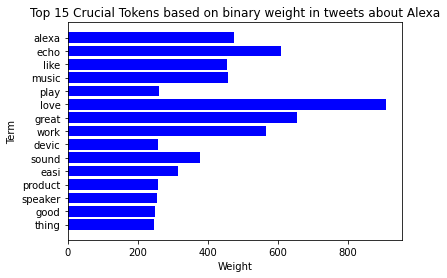

+----+---------+----------+
|    | term    |   weight |
|----+---------+----------|
|  0 | thing   |      245 |
|  1 | good    |      248 |
|  2 | speaker |      255 |
|  3 | product |      257 |
|  4 | easi    |      315 |
|  5 | sound   |      378 |
|  6 | devic   |      258 |
|  7 | work    |      566 |
|  8 | great   |      654 |
|  9 | love    |      909 |
| 10 | play    |      262 |
| 11 | music   |      456 |
| 12 | like    |      455 |
| 13 | echo    |      609 |
| 14 | alexa   |      475 |
+----+---------+----------+


In [7]:
analyze_tokens_and_doc(alexa, 'blue', 'Alexa')

# Text Classification

## Models used
* Multinomial Logistic Regression
* Decision Tree
* Random Forest
* Gradient Boosting
* MLP
* Bagging

## Vectorization and data splitting into training and test sets

In [8]:
X = alexa['verified_reviews']
y = alexa['rating']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=1)

vectorizer = CountVectorizer(tokenizer=text_tokenizer)

X_train_transform = vectorizer.fit_transform(X_train)
X_test_transform = vectorizer.transform(X_test)

## Prediction

### Multinomial Logistic Regression

Multinomial Logistic Regression accuracy:  0.7915
              precision    recall  f1-score   support

           1       0.73      0.33      0.46        48
           2       0.50      0.35      0.41        23
           3       0.45      0.38      0.41        40
           4       0.59      0.27      0.38       142
           5       0.83      0.97      0.89       692

    accuracy                           0.79       945
   macro avg       0.62      0.46      0.51       945
weighted avg       0.76      0.79      0.76       945



Text(0.5, 1.0, 'Multinomial Logistic Regression')

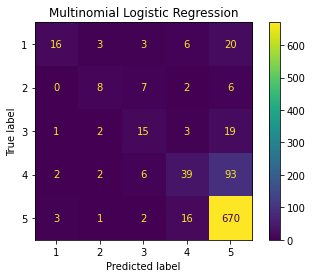

In [10]:
mlg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=115)
mlg  = mlg.fit(X_train_transform,Y_train)

# Model evaluation

print("Multinomial Logistic Regression accuracy: ", round(mlg.score(X_test_transform,Y_test),4))
y_pred_mlg= mlg.predict(X_test_transform)

print(classification_report(Y_test, y_pred_mlg))

mlg_cm = confusion_matrix(Y_test, y_pred_mlg)
plt = ConfusionMatrixDisplay(confusion_matrix=mlg_cm, display_labels=['1', '2', '3', '4', '5'])
plt.plot()
plt.ax_.set_title("Multinomial Logistic Regression")

### Decision Tree Classifier

Decision tree classifier prediction accuracy:  0.7534
              precision    recall  f1-score   support

           1       0.32      0.38      0.35        48
           2       0.41      0.30      0.35        23
           3       0.32      0.42      0.37        40
           4       0.55      0.40      0.47       142
           5       0.86      0.89      0.87       692

    accuracy                           0.75       945
   macro avg       0.49      0.48      0.48       945
weighted avg       0.75      0.75      0.75       945



Text(0.5, 1.0, 'Decision Tree Classifier')

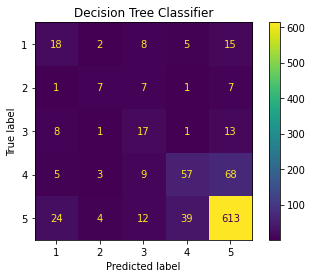

In [11]:
dt = DecisionTreeClassifier()
dt = dt.fit(X_train_transform, Y_train)

# Model evaluation

print("Decision tree classifier prediction accuracy: ", round(dt.score(X_test_transform,Y_test),4))
y_pred_dtcf = dt.predict(X_test_transform)

print(classification_report(Y_test, y_pred_dtcf))

dtcf_cm = confusion_matrix(Y_test, y_pred_dtcf)
plt = ConfusionMatrixDisplay(confusion_matrix=dtcf_cm, display_labels=['1', '2', '3', '4', '5'])
plt.plot()
plt.ax_.set_title('Decision Tree Classifier')

### Random Forest Classifier

Random forest classifier prediction accuracy:  0.8138
              precision    recall  f1-score   support

           1       0.71      0.31      0.43        48
           2       1.00      0.30      0.47        23
           3       0.88      0.38      0.53        40
           4       0.69      0.37      0.48       142
           5       0.82      0.98      0.90       692

    accuracy                           0.81       945
   macro avg       0.82      0.47      0.56       945
weighted avg       0.81      0.81      0.78       945



Text(0.5, 1.0, 'Random Forest Classifier')

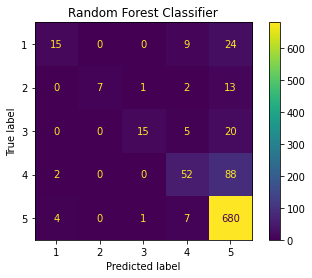

In [12]:
rf = RandomForestClassifier(n_estimators=150)
rf = rf.fit(X_train_transform,Y_train)

# Model evaluation

print("Random forest classifier prediction accuracy: ", round(rf.score(X_test_transform,Y_test),4))
y_pred_rfcl= rf.predict(X_test_transform)

print(classification_report(Y_test, y_pred_rfcl))

rfcl_cm = confusion_matrix(Y_test, y_pred_rfcl)
plt = ConfusionMatrixDisplay(confusion_matrix=rfcl_cm, display_labels=['1', '2', '3', '4', '5'])
plt.plot()
plt.ax_.set_title("Random Forest Classifier")

### Gradient Boosting Classifier

Gradient Boosting classifier prediction accuracy:  0.8133
                   precision    recall  f1-score   support

          Arsenal       0.99      0.71      0.83       992
          Chelsea       0.52      0.99      0.68       967
        Liverpool       0.98      0.63      0.77       936
  Manchester City       0.98      0.81      0.88      1014
Manchester United       0.99      0.93      0.96       966

         accuracy                           0.81      4875
        macro avg       0.89      0.81      0.82      4875
     weighted avg       0.89      0.81      0.83      4875



Text(0.5, 1.0, 'Gradient Boosting Classifier')

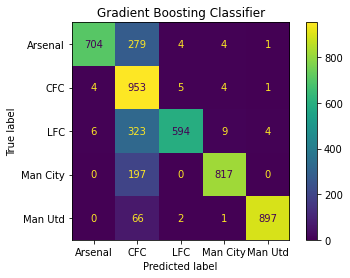

In [73]:
clf = GradientBoostingClassifier()
clf  = clf.fit(X_train_transform,Y_train)

# Model evaluation

print("Gradient Boosting classifier prediction accuracy: ", round(clf.score(X_test_transform,Y_test),4))
y_pred_clf= clf.predict(X_test_transform)

print(classification_report(Y_test, y_pred_clf))

rfcl_cm = confusion_matrix(Y_test, y_pred_clf)
plt = ConfusionMatrixDisplay(confusion_matrix=rfcl_cm, display_labels=['Arsenal', 'CFC', 'LFC', 'Man City', 'Man Utd'])
plt.plot()
plt.ax_.set_title("Gradient Boosting Classifier")

### Multilayer perceptron

MLP classifier prediction accuracy:  0.7735
              precision    recall  f1-score   support

           1       0.91      0.21      0.34        48
           2       0.57      0.17      0.27        23
           3       0.50      0.17      0.26        40
           4       0.48      0.22      0.30       142
           5       0.80      0.98      0.88       692

    accuracy                           0.77       945
   macro avg       0.65      0.35      0.41       945
weighted avg       0.74      0.77      0.73       945



Text(0.5, 1.0, 'Multilayer perceptron Classifier')

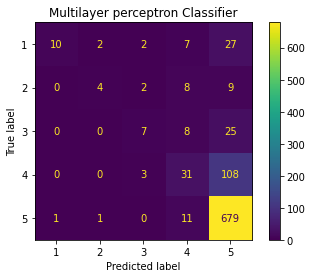

In [13]:
mlp = MLPClassifier(early_stopping=True)
mlp  = mlp.fit(X_train_transform,Y_train)

# Model evaluation

print("MLP classifier prediction accuracy: ", round(mlp.score(X_test_transform,Y_test),4))
y_pred_mlp= mlp.predict(X_test_transform)

print(classification_report(Y_test, y_pred_mlp))

mlp_cm = confusion_matrix(Y_test, y_pred_mlp)
plt = ConfusionMatrixDisplay(confusion_matrix=mlp_cm, display_labels=['1', '2', '3', '4', '5'])
plt.plot()
plt.ax_.set_title("Multilayer perceptron Classifier")

Bagging classifier prediction accuracy:  0.7778
              precision    recall  f1-score   support

           1       0.61      0.46      0.52        48
           2       0.44      0.30      0.36        23
           3       0.45      0.33      0.38        40
           4       0.50      0.41      0.45       142
           5       0.85      0.92      0.88       692

    accuracy                           0.78       945
   macro avg       0.57      0.48      0.52       945
weighted avg       0.76      0.78      0.76       945



Text(0.5, 1.0, 'Bagging Classifier')

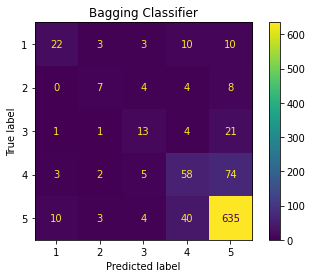

In [14]:
bg = BaggingClassifier()
bg  = bg.fit(X_train_transform, Y_train)

# Model evaluation

print("Bagging classifier prediction accuracy: ", round(bg.score(X_test_transform,Y_test),4))
y_pred_bg= bg.predict(X_test_transform)

print(classification_report(Y_test, y_pred_bg))

bg_cm = confusion_matrix(Y_test, y_pred_bg)
plt = ConfusionMatrixDisplay(confusion_matrix=bg_cm, display_labels=['1', '2', '3', '4', '5'])
plt.plot()
plt.ax_.set_title("Bagging Classifier")

# Prediction accuracy comparison

### Classifiers achieved the following prediction accuracy:



| Pos | Classifier | Accuracy |
| :- | -: | :-: |
| 1 | MLP | **88,08%**
| 2 | Multinomial Logistic Regression | **86,87%**
| 3 | Random Forest | **86,52%**
| 4 | Bagging | **83,98%**
| 5 | Decision Tree | **82,95%**
| 6 | Gradient Boosting | **81,33%**


# Classification Evaluation

Prediction quality for classifier with the best accuracy - **MLP Classifier**

In [6]:
print("MLP classifier prediction accuracy: ", round(mlp.score(X_test_transform,Y_test),4))

print(classification_report(Y_test, y_pred_mlp))

MLP classifier prediction accuracy:  0.8808
                   precision    recall  f1-score   support

          Arsenal       0.88      0.88      0.88       992
          Chelsea       0.76      0.88      0.81       967
        Liverpool       0.86      0.82      0.84       936
  Manchester City       0.94      0.88      0.91      1014
Manchester United       0.99      0.94      0.96       966

         accuracy                           0.88      4875
        macro avg       0.89      0.88      0.88      4875
     weighted avg       0.89      0.88      0.88      4875



* **Overall model accuracy**: 88,08% of all tweets were correctly classified with the corresponding club.

**Arsenal class**

* **Precision**: 88% of tweets classified as Arsenal turned out to be correct.
* **Recall (sensitivity)**: Of all the tweets actually about Arsenal, the model correctly classified 88%.
* **f1-score**: f1 score at the level of 0.88 proves that the model well predicts each observation of this class.

**Chelsea class**

* **Precision**: 76% of tweets classified as Chelsea turned out to be correct.
* **Recall (sensitivity)**: Of all the tweets actually about Chelsea, the model correctly classified 88%.
* **f1-score**: f1 score at the level of 0.81 proves that the model well predicts each observation of this class.

**Liverpool class**

* **Precision**: 86% of tweets classified as Liverpool turned out to be correct.
* **Recall (sensitivity)**: Of all the tweets actually about Liverpool, the model correctly classified 82%.
* **f1-score**: f1 score at the level of 0.84 proves that the model well predicts each observation of this class.

**Manchester City class**

* **Precision**: 94% of tweets classified as Manchester City turned out to be correct.
* **Recall (sensitivity)**: Of all the tweets actually about Manchester City, the model correctly classified 88%.
* **f1-score**: f1 score at the level of 0.91 proves that the model well predicts each observation of this class.

**Manchester United class**

* **Precision**: 99% of tweets classified as Manchester United turned out to be correct.
* **Recall (sensitivity)**: Of all the tweets actually about Manchester United, the model correctly classified 94%.
* **f1-score**: f1 score at the level of 0.96 proves that the model well predicts each observation of this class.
